In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

df=pd.read_csv(r'F:\bi_projects\Python Assignment 2\Ecommerce - UK Retailer.csv',encoding = 'ISO-8859-1')

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import missingno as msno # missing data visualization module for Python
import pandas_profiling

%matplotlib inline

import gc
import datetime

In [2]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

In [5]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   cust_id       406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [7]:
df.isnull().sum().sort_values(ascending=False)# check missing values for each column 

cust_id         135080
description       1454
country              0
unit_price           0
invoice_date         0
quantity             0
stock_code           0
invoice_num          0
dtype: int64

In [8]:
df[df.isnull().any(axis=1)].head()
# check out the rows with missing values

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [9]:
df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')
# change the invoice_date format - String to Timestamp format

In [10]:
df['description'] = df.description.str.lower()
# change description - UPPER case to LOWER case

In [11]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
data_new = df.dropna()
# data_new without missing values

In [13]:
data_new.isnull().sum().sort_values(ascending=False)
# check missing values for each column 

country         0
cust_id         0
unit_price      0
invoice_date    0
quantity        0
description     0
stock_code      0
invoice_num     0
dtype: int64

In [14]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  float64       
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [15]:
data_new['cust_id'] = data_new['cust_id'].astype('int64')
#change columns type - String to Int type 

In [16]:
data_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [17]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  int64         
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [18]:
data_new.describe().round(2)

,quantity,unit_price,cust_id
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


In [19]:
data_new = data_new[data_new.quantity > 0]#removing negitive values

In [20]:
data_new.describe().round(2)

,quantity,unit_price,cust_id
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


In [21]:
data_new['amount_spent'] = data_new['quantity'] * data_new['unit_price']# adding new column amount_spent

In [22]:
data_new = data_new[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']]
# rearranging the columns 

In [23]:
data_new.insert(loc=2, column='year_month', value=data_new['invoice_date'].map(lambda x: 100*x.year + x.month))
data_new.insert(loc=3, column='month', value=data_new.invoice_date.dt.month)
# +1 to make Monday=1.....until Sunday=7
data_new.insert(loc=4, column='day', value=(data_new.invoice_date.dt.dayofweek)+1)
data_new.insert(loc=5, column='hour', value=data_new.invoice_date.dt.hour)

In [24]:
data_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


In [25]:
data_new.shape

(397924, 13)

In [26]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   397924 non-null  object        
 1   invoice_date  397924 non-null  datetime64[ns]
 2   year_month    397924 non-null  int64         
 3   month         397924 non-null  int64         
 4   day           397924 non-null  int64         
 5   hour          397924 non-null  int64         
 6   stock_code    397924 non-null  object        
 7   description   397924 non-null  object        
 8   quantity      397924 non-null  int64         
 9   unit_price    397924 non-null  float64       
 10  amount_spent  397924 non-null  float64       
 11  cust_id       397924 non-null  int64         
 12  country       397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 42.5+ MB


# 1) Boxplot - All Numerical Values

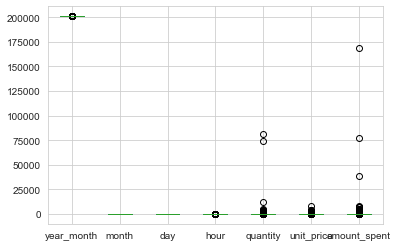

In [27]:
data_new[['year_month','month','day','hour','quantity','unit_price','amount_spent']].plot.box()

# 2)Histogram – All Numeric Variables

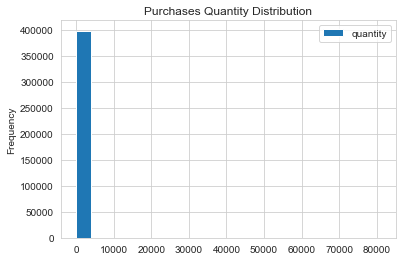

In [28]:
data_new[['quantity']].plot.hist(bins = 20, title = 'Purchases Quantity Distribution')

# c) Distribution Plot – All Numeric Variables

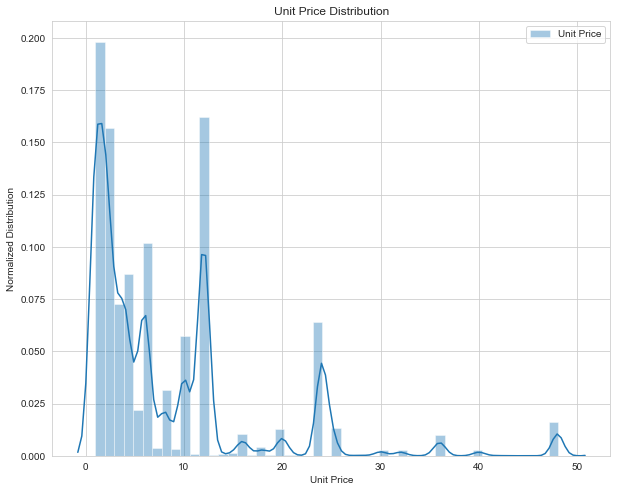

In [29]:
plt.subplots(figsize=(10,8))
sns.distplot(data_new.quantity[data_new.quantity < 50], label='Unit Price').legend()

plt.xlabel('Unit Price')
plt.ylabel('Normalized Distribution')
plt.title('Unit Price Distribution')
plt.show()

# d)Aggregation for all numerical Columns

In [30]:
#sum groupby StockCode
df_quant_sold = data_new[['stock_code','quantity']].groupby('stock_code').sum()
df_quant_sold.reset_index(inplace = True)
#order descending
df_quant_sold.sort_values(by = ['quantity'], ascending = False, inplace = True)
df_quant_sold.head()

,stock_code,quantity
2399,23843,80995
1997,23166,77916
2804,84077,54415
1088,22197,49183
3219,85099B,46181


# e)Unique Values across all columns

In [31]:
uniqueValues = data_new.nunique()
print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
invoice_num     18536
invoice_date    17286
year_month         13
month              12
day                 6
hour               15
stock_code       3665
description      3877
quantity          302
unit_price        441
amount_spent     2940
cust_id          4339
country            37
dtype: int64


# f)Duplicate values across all columns

In [32]:
data_new.duplicated(subset=None, keep='first')

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 397924, dtype: bool

# g)Correlation – Heatmap - All Numeric Variables

In [42]:
corr = data_new[['quantity','unit_price','amount_spent']].corr()
corr.style.background_gradient(cmap='Blues').set_precision(2)

,quantity,unit_price,amount_spent
quantity,1.00,-0.00,0.91
unit_price,-0.00,1.00,0.08
amount_spent,0.91,0.08,1.00


# h)Regression Plot - All Numeric Variables

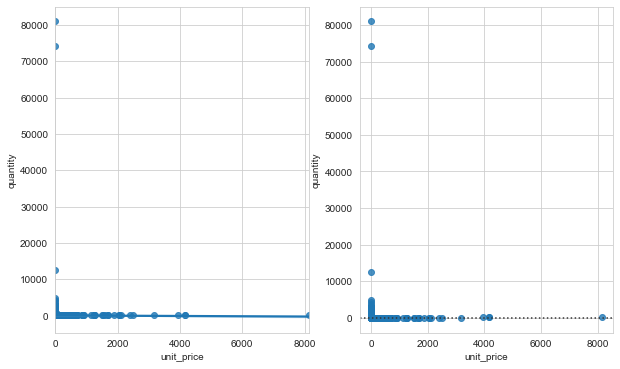

In [34]:
fig, [ax0,ax1] = plt.subplots(1,2)
fig.set_size_inches([10,6])
sns.regplot(data=data_new,x='unit_price',y='quantity',ax=ax0)
sns.residplot(data=data_new,x='unit_price',y='quantity',ax=ax1)
plt.show()

# i)Bar Plot – Every Categorical Variable vs every Numerical Variable

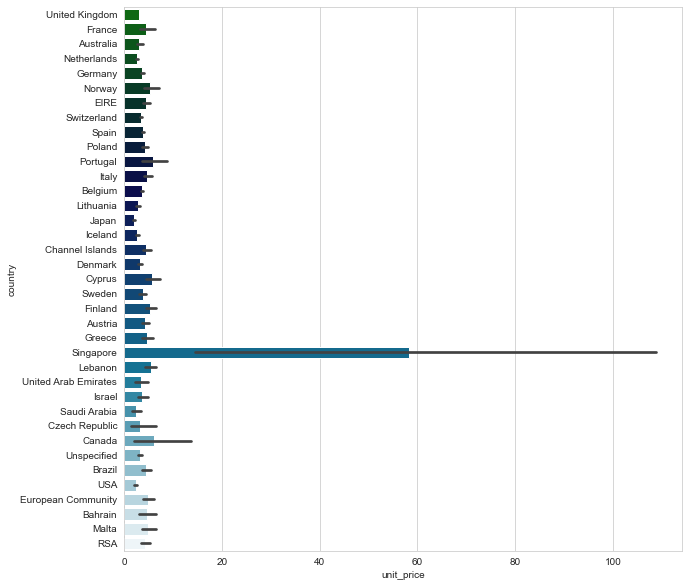

In [35]:
#unitprice vs country
plt.figure(figsize=(10,10))
sns.barplot(x = 'unit_price',y = 'country',data = data_new,palette='ocean')
plt.show()

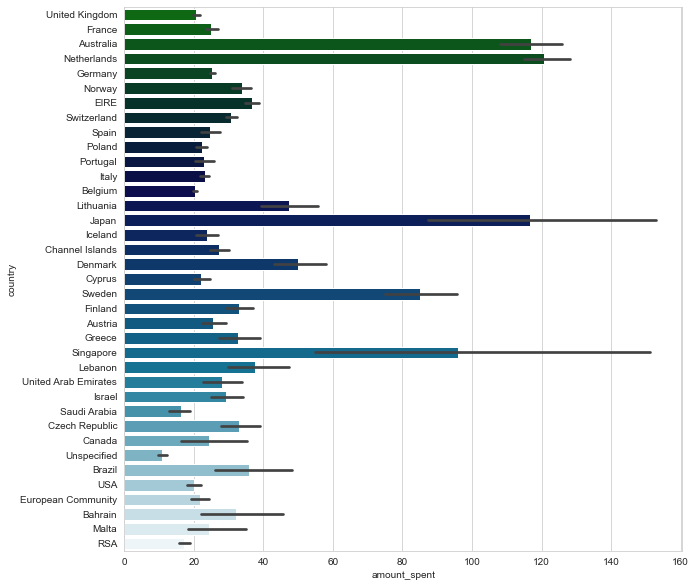

In [36]:
#amount spent vs country
plt.figure(figsize=(10,10))
sns.barplot(x = 'amount_spent',y = 'country',data = data_new,palette='ocean')
plt.show()

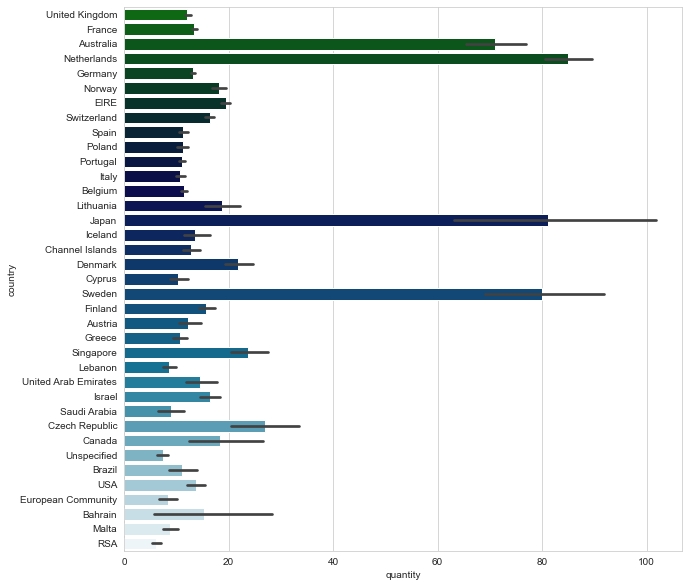

In [37]:
#quantity vs country
plt.figure(figsize=(10,10))
sns.barplot(x = 'quantity',y ='country',data = data_new,palette='ocean')
plt.show()

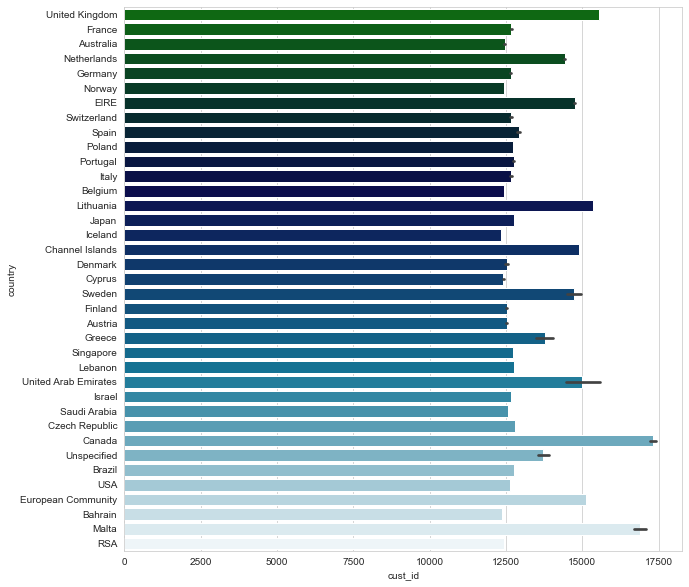

In [38]:
#quantity vs country
plt.figure(figsize=(10,10))
sns.barplot(x = 'cust_id',y ='country',data = data_new,palette='ocean')
plt.show()

# j)Pair plot - All Numeric Variables

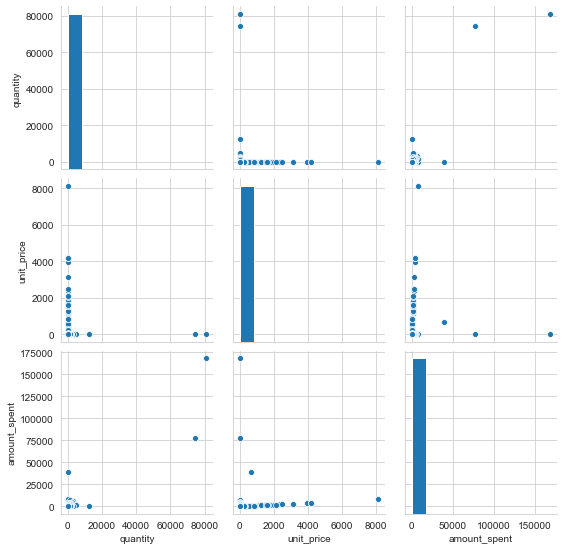

In [39]:
sns.pairplot(data_new, vars = ['quantity', 'unit_price', 'amount_spent'])

# k)Line chart to show the trend of data - All Numeric/Date Variables

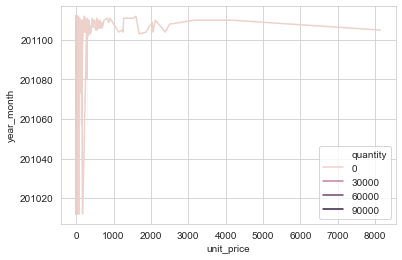

In [40]:
sns.lineplot(x = "unit_price", y = "year_month", data=data_new, hue="quantity")
plt.show()

# l)Skewness all numeric variables

In [41]:
data_new.skew(axis = 0, skipna = True)

invoice_num      -0.178563
year_month       -3.396179
month            -0.444842
day               0.396235
hour              0.189037
quantity        403.319431
unit_price      204.042413
amount_spent    451.465538
cust_id           0.025776
dtype: float64